In [6]:
import numpy as np
import sys, os
from matplotlib import pyplot as plt
import pickle 

## Intro
In this notebook, we plot the results pertaining to the aggregation validity. 
First, you will need to run submit_agg_validity.py to generate the results of the experiments.
Here, we will retrieve the metrics from the generated results folder and plot the results for different configurations of aggregation methods. The configurations are based on the parameters used in submit_agg_validity.py.


## Retrieve Metrics from results folder

In [7]:
if os.path.expanduser('~') == '/Users/urmininad':
    folder_name = os.path.expanduser('~') + '/Documents/Python/aggregation_validity/metrics/'
else:
    print("Change path to local path as needed")
    folder_name = os.getcwd()+'/metrics_agg_validity/'

def get_metrics_from_config(para_setup):
    file_name = folder_name + para_setup + '_metrics'
    try:
        results = pickle.load(open(file_name.replace("'", "").replace('"', '') + '.dat', 'rb'), encoding='latin1')
    except:
        print("failed  ", file_name.replace("'", "").replace('"', '') + '.dat')
        return None
    return results

def get_results_from_para(para_setup):
    para_setup_str = tuple(para_setup.split("-"))
    results = get_metrics_from_file(para_setup_str)
    return results    

def get_metrics_from_file(para_setup):

    name_string = '%s-'*len(para_setup)  # % para_setup
    name_string = name_string[:-1]
    #print(name_string% (para_setup))

    try:
        print("load from metrics file  %s_metrics.dat " % (folder_name + name_string % (para_setup)))
        results = pickle.load(open(folder_name + name_string % (para_setup) + '_metrics.dat', 'rb'), encoding='latin1')
    except:
        print('***---*** failed from metrics file '  , (para_setup))
        return None

    return results      

## Plots

In [9]:
# Change save_folder for figures to local path as needed
if os.path.expanduser('~') == '/Users/urmininad':
  save_folder = os.path.expanduser('~') + '/Documents/Python/aggregation_validity/figures/'
else:
    print("Change save_folder for figures as needed")
    newpath_fig = os.getcwd() + '/local_figures'
    if not os.path.exists(newpath_fig):
      os.makedirs(newpath_fig)
    save_folder = os.getcwd() + '/local_figures/'

### AVERAGE: Single Sample Size, Compare increasing d_micro

In [273]:
## Copy from submit_agg_validity.py 
anyconfigurations = []
                                                            
for agg_method in ['avg']:#, 'pca_1']:
    for data_gen in ['mrf_ts']:#, 'coarse_dag','mrf_ts','mrf','savar']:    
        for d_macro in [5]:
            for d_micro in [5,10,20,50]:   
                for T in [1000]:
                    for coeff in [0.5]:
                        for auto in [0.3]:
                            for contemp_frac in [1.]:
                                for pc_alpha in [0.01]:
                                    for tau_max in [0]:
                                        for ci_test in ['parcorr_gcm_gmb']: #'parcorr_maxcorr'
                                            for internal_ER in [0.3]:
                                                for external_ER in [0.5]: 
                                                    for neg in [0., 0.2, 0.4, 0.6, 0.8, 1.]:
                                                        for pca_weight in ['None']: #[0.,0.1,0.2,0.3,0.4]:
                                                            para_setup = (agg_method,data_gen,d_macro,d_micro,T,coeff,auto,contemp_frac,
                                                                pc_alpha,tau_max,ci_test,internal_ER,external_ER,neg,pca_weight)
                                                            name = '%s-'*len(para_setup) % para_setup
                                                            name = name[:-1]
                                                            anyconfigurations += [name]
                                                            
config_list  = anyconfigurations                                                            

In [278]:
get_metrics_from_config(config_list[0])

{'adj_anylink_precision': (0.8812877263581489, 0.012440331499048536),
 'adj_anylink_recall': (0.876, 0.01329044393539961),
 'all_precision': (0.358148893360161, 0.029485126037106946),
 'all_recall': (0.356, 0.029269504608038722),
 'edgemarks_anylink_precision': (0.358148893360161, 0.02815329466095861),
 'edgemarks_anylink_recall': (0.356, 0.029161618610769872),
 'unoriented_anylink': (0.0, 0.0),
 'conflicts_anylink': (0.014084507042253521, 0.0065119369585165164),
 'ind_score': (0.8102347619047618, 0.017638362810374036),
 'dep_score': (1.0, 0.0),
 'shd': (3.82355, 0.21125552655492827),
 'computation_time': (0.2342531418800354, array([0.2012296 , 0.27069407]))}

In [301]:
neg_list  = [0., 0.2, 0.4, 0.6, 0.8, 1.]
def ind_score_group_size_plots(config_list, which = ['adj_anylink_recall'] , x=neg_list, save= 'no'):
    
    ## FOR VERTICAL PANEL
    # fig, (axs) = plt.subplots(4,1, figsize=(6,  16))#, layout="constrained")
    
    ## FOR HORIZONTAL PANEL
    # fig, (axs) = plt.subplots(1,4, figsize=(32,  4))#, layout="constrained")
    
    ## FOR HORIZONTAL PANEL
    fig, (axs) = plt.subplots(2,2, figsize=(14,  8))#, layout="constrained")
    axs = axs.ravel()
    count = 0
    for ind,which in enumerate(which):

        for j in range(4):
            y = []
            y_err = []
            for i in range(len(x)):
                results = get_metrics_from_config(config_list[i+count])
                # y.append(results['adj_anylink_precision'][0])
                # y_err.append(results['adj_anylink_precision'][1]) 
                
                y.append(results['ind_score'][0])
                y_err.append(results['ind_score'][1])
                # y.append(results['dep_score'][0])
                # y_err.append(results['dep_score'][1])

            # y = np.ones(len(x))-y ## UNCOMMENT if which == 'shd'
            color1 = 'tab:red'
            paralist = config_list[count].split('-')
            d_macro = int(paralist[2])
            d_micro = int(paralist[3])
            T = int(paralist[4])
            offset = int(4*ind)
            axs[j+offset].plot(x,y, label = d_micro,color=color1)
            axs[j+offset].errorbar(x,y,yerr = y_err,color=color1,marker='o')
            # axs[j].set_xlabel('decreasing coeff_average')
            # axs[j+offset].set_ylabel('ind_score',color=color1)
            axs[j+offset].tick_params(axis='y', labelcolor=color1)
            axs[j+offset].grid(True)
            axs[j+offset].set_ylim(0.0, 1.0)
            # axs[j+offset].legend()
            toptext = 'T='+str(T)+'$, d_{micro}=$'+str(d_micro)  #+', d_micro='+str(d_micro)
            # middletext = '$d_{micro}=$'+str(d_micro)
            bottomtext = '$d_{macro}=$'+str(d_macro)
            
            ## FOR VERTICAL PANEL
            #####################
            # axs[j+offset].annotate(toptext+"\n"+bottomtext, xy=(320, 40), xycoords='axes points',
            #     size=8, ha='right', va='top',
            #     bbox=dict(boxstyle='round', fc='w'))
            
            ## FOR HORIZONTAL PANEL
            #####################
            axs[j+offset].annotate(toptext+"\n"+bottomtext, xy=(340, 50), xycoords='axes points',
                size=14, ha='right', va='top',
                bbox=dict(boxstyle='round', fc='w'))
            
            #For SHD
            ###########
            # axs[j+offset].annotate(toptext+"\n"+bottomtext, xy=(340, 190), xycoords='axes points',
            #     size=14, ha='right', va='top',
            #     bbox=dict(boxstyle='round', fc='w'))
           
           
            ax_twin = axs[j+offset].twinx()
            color = 'tab:green'
            y_which = []
            y_which_err = []
            for i in range(len(x)):
                results = get_metrics_from_config(config_list[i+count])    
                y_which.append(results[which][0])
                y_which_err.append(results[which][1])

            # ax_twin.set_ylabel(which, color=color)  
            ax_twin.plot(x, y_which, color=color)
            ax_twin.errorbar(x, y_which, yerr=y_which_err,color=color,marker='o')
            ax_twin.tick_params(axis='y', labelcolor=color)
            ax_twin.set_ylim(0.0, 1.0)

            count += len(x)
                   
        ## FOR VERTICAL PANEL
        # plt.figtext(0.5, 0.08, r"decreasing coeff_avg", fontsize=12,
        #                 horizontalalignment='center', va='bottom')
        ## FOR HORIZONTAL PANEL
        # plt.figtext(0.5, 0., r"decreasing coeff_avg", fontsize=18,
        #                 horizontalalignment='center', va='bottom')

    if save == 'yes':
        save_type = 'pdf'
        # save_folder = os.path.expanduser('~') + '/Documents/Python/aggregation_validity/figures/'
        para_setup_name = (agg_method,which,T,internal_ER, external_ER)
        save_suffix = '%s-'*len(para_setup_name) % para_setup_name
        fig.savefig(save_folder + '%s.%s' %(save_suffix, save_type),bbox_inches = 'tight')

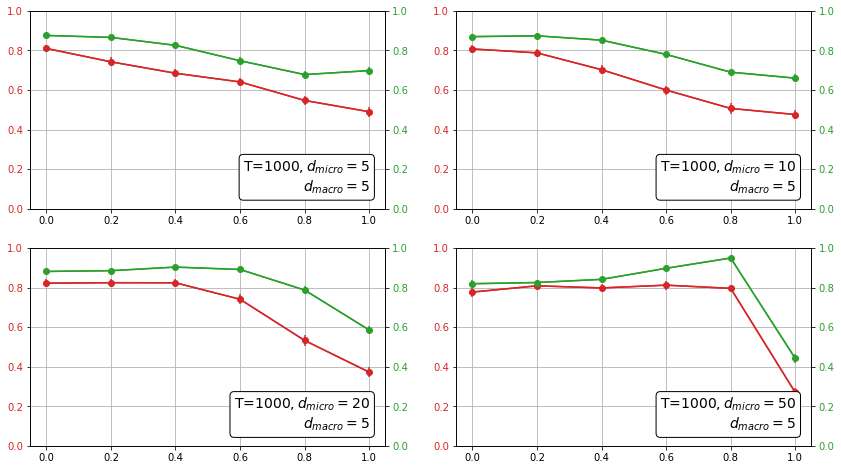

In [302]:
neg_list  = [0., 0.2, 0.4, 0.6, 0.8, 1.]
which = ['adj_anylink_recall']
ind_score_group_size_plots(config_list, which = which, x = neg_list,save = 'no')

### AVERAGE: Single Sample Size, Compare increasing d_micro

In [263]:
anyconfigurations = []
                                                            
for agg_method in ['avg']:#, 'pca_1']:
    for data_gen in ['mrf_ts']:#, 'coarse_dag','mrf_ts','mrf','savar']:    
        for d_macro in [5]:
            for d_micro in [3]:   
                for T in [200]:
                    for coeff in [0.5]:
                        for auto in [0.3]:
                            for contemp_frac in [0.]:
                                for pc_alpha in [0.01]:
                                    for tau_max in [1]:
                                        for ci_test in ['parcorr_gcm_gmb']: #'parcorr_maxcorr'
                                            for internal_ER in [0.3]:
                                                for external_ER in [0.5]: 
                                                    for neg in [0., 0.2, 0.4, 0.6, 0.8, 1.]:
                                                        for pca_weight in ['None']: #[0.,0.1,0.2,0.3,0.4]:
                                                            para_setup = (agg_method,data_gen,d_macro,d_micro,T,coeff,auto,contemp_frac,
                                                                pc_alpha,tau_max,ci_test,internal_ER,external_ER,neg,pca_weight)
                                                            name = '%s-'*len(para_setup) % para_setup
                                                            name = name[:-1]
                                                            anyconfigurations += [name]
                                                            
config_list  = anyconfigurations  
config_list

['avg-mrf_ts-5-3-200-0.5-0.3-0.0-0.01-1-parcorr_gcm_gmb-0.3-0.5-0.0-None',
 'avg-mrf_ts-5-3-200-0.5-0.3-0.0-0.01-1-parcorr_gcm_gmb-0.3-0.5-0.2-None',
 'avg-mrf_ts-5-3-200-0.5-0.3-0.0-0.01-1-parcorr_gcm_gmb-0.3-0.5-0.4-None',
 'avg-mrf_ts-5-3-200-0.5-0.3-0.0-0.01-1-parcorr_gcm_gmb-0.3-0.5-0.6-None',
 'avg-mrf_ts-5-3-200-0.5-0.3-0.0-0.01-1-parcorr_gcm_gmb-0.3-0.5-0.8-None',
 'avg-mrf_ts-5-3-200-0.5-0.3-0.0-0.01-1-parcorr_gcm_gmb-0.3-0.5-1.0-None']

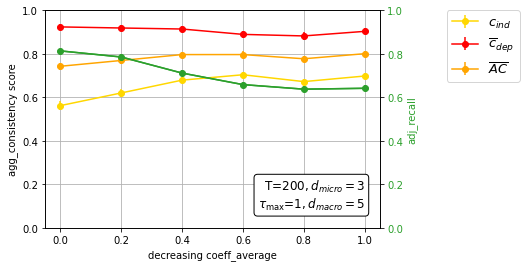

In [267]:
save= 'no'
x  = [0., 0.2, 0.4, 0.6, 0.8, 1.]
which = 'adj_anylink_recall'#'adj_anylink_precision' # 'adj_anylink_recall'


y_ind = []
y_ind_err = []

y_dep = []
y_dep_err = []
fig, (axs) = plt.subplots(1,1, figsize=(6,  4))#, layout="constrained")
for i in range(len(x)):
    results = get_metrics_from_config(config_list[i])
    
    y_ind.append(results['ind_score'][0])
    y_ind_err.append(results['ind_score'][1])
    
    y_dep.append(results['dep_score'][0])
    y_dep_err.append(results['dep_score'][1])
    
color1 = 'tab:orange'
# axs.plot(x,y)

y_ac = (np.array(y_ind)+np.array(y_dep))/2
y_ac_err = (np.array(y_ind_err) + np.array(y_dep_err))/2

axs.errorbar(x,y_ind,yerr = y_ind_err,label = '$c_{ind}$',marker='o',color = 'gold')
axs.errorbar(x,y_dep,yerr = y_dep_err,label = '$\\overline{c}_{dep}$', marker='o',color = 'red')
axs.errorbar(x,y_ac,yerr = y_ac_err, label = '$\\overline{AC}$', marker='o',color = 'orange')

axs.set_xlabel('decreasing coeff_average')
axs.set_ylabel('agg_consistency score')#,color=color1)
axs.tick_params(axis='y')#, labelcolor=color1)
axs.set_ylim(0.0, 1.0)
axs.grid(True)
axs.legend(bbox_to_anchor=(1.2, 1.), loc='upper left', borderaxespad=0., prop={'size': 13})

ax_twin = axs.twinx()
color = 'tab:green'
y_which = []
y_which_err = []
for i in range(len(x)):
    results = get_metrics_from_config(config_list[i])    
    y_which.append(results[which][0])
    y_which_err.append(results[which][1])

# ax_twin.set_ylabel(which, color=color)  
ax_twin.plot(x, y_which, color=color)
ax_twin.errorbar(x, y_which, yerr=y_which_err, label = which, color=color,marker='o')
ax_twin.tick_params(axis='y', labelcolor=color)
ax_twin.set_ylim(0.0, 1.0)
ax_twin.set_ylabel('adj_recall', color=color)
# ax_twin.legend(bbox_to_anchor=(1.2, 0.7), loc='upper left', borderaxespad=0., prop={'size': 13})


paralist = config_list[0].split('-')
d_macro = int(paralist[2])
d_micro = int(paralist[3])
T = int(paralist[4])
tau = int(paralist[9])
toptext = 'T='+str(T)+'$, d_{micro}=$'+str(d_micro)  
bottomtext = '$\\tau_{\max}$='+str(tau)+'$, d_{macro}=$'+str(d_macro)
axs.annotate(toptext+"\n"+bottomtext, xy=(320, 50), xycoords='axes points',
    size=12, ha='right', va='top',
    bbox=dict(boxstyle='round', fc='w'))
    
    
if save == 'yes':
    save_type = 'pdf'
    # save_folder = os.path.expanduser('~') + '/Documents/Python/aggregation_validity/figures/'
    para_setup_name = (agg_method,which,d_macro,d_micro,T,internal_ER, external_ER)
    save_suffix = '%s-'*len(para_setup_name) % para_setup_name
    save_suffix = 'all_scores-'+save_suffix
    fig.savefig(save_folder + '%s.%s' %(save_suffix, save_type),bbox_inches = 'tight')

### PCA: comparing increasing p_comps

In [434]:
anyconfigurations = []
for agg_method in ['pca_1', 'pca_2','pca_3', 'pca_4']:# ['avg','pca_1']:
    for data_gen in ['mrf_ts']:#, 'coarse_dag','mrf_ts','mrf','savar']:    
        for d_macro in [5]:
            for d_micro in [50]:   
                for T in [1000]:
                    for coeff in [0.5]:
                        for auto in [0.3]:
                            for contemp_frac in [1.]:
                                for pc_alpha in [0.01]:
                                    for tau_max in [0]:
                                        for ci_test in ['parcorr_gcm_gmb']: #'parcorr_maxcorr'
                                            for internal_ER in [0.3]:
                                                for external_ER in [0.5]: 
                                                    for neg in [1.0]:#[0., 0.2, 0.4, 0.6, 0.8, 1.]:
                                                        for pca_weight in ['None']:#,0.1,0.2,0.3,0.4]: #[0.,0.1,0.2,0.3,0.4]: #['None']
                                                            para_setup = (agg_method,data_gen,d_macro,d_micro,T,coeff,auto,contemp_frac,
                                                                pc_alpha,tau_max,ci_test,internal_ER,external_ER,neg,pca_weight)
                                                            name = '%s-'*len(para_setup) % para_setup
                                                            name = name[:-1]
                                                            anyconfigurations += [name]
config_list = anyconfigurations

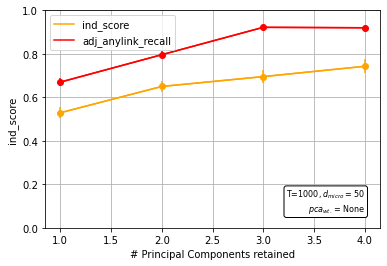

In [436]:
which  = 'adj_anylink_recall'
save = 'yes'
fig, (axs) = plt.subplots(1,1, figsize=(6,  4))#, layout="constrained")
x = [1,2,3,4]
y = []
y_err = []
y2 = []
y2_err = []
for i in range(len(x)):
    results = get_metrics_from_config(config_list[i])
    # print(results, '---\n')
    y.append(results['ind_score'][0])
    y_err.append(results['ind_score'][1])
    y2.append(results[which][0])
    y2_err.append(results[which][1])
    
# color1 = 'tab:orange'
paralist = config_list[0].split('-')
d_macro = int(paralist[2])
d_micro = int(paralist[3])
T = int(paralist[4])
# pca_weight =  float(paralist[14])


axs.plot(x,y, label = 'ind_score',color= 'orange')
axs.errorbar(x,y,yerr = y_err,color= 'orange', marker='o')
axs.plot(x,y2, label = which,color= 'red')
axs.errorbar(x,y2,yerr = y2_err,color='red', marker='o')
axs.legend()
axs.set_xlabel('# Principal Components retained')
axs.set_ylabel('ind_score')#,color=color1)
axs.tick_params(axis='y')#, labelcolor=color1)
axs.grid(True)
axs.set_ylim(0.0, 1.0)


toptext = 'T='+str(T)+'$, d_{micro}=$'+str(d_micro)  #+', d_micro='+str(d_micro)
# # middletext = '$d_{micro}=$'+str(d_micro)
bottomtext = '$pca_{wt.}=$'+str(pca_weight)
axs.annotate(toptext+"\n"+bottomtext, xy=(320, 40), xycoords='axes points',
    size=8, ha='right', va='top',
    bbox=dict(boxstyle='round', fc='w'))

if save == 'yes':
    save_type = 'pdf'
    # save_folder = os.path.expanduser('~') + '/Documents/Python/aggregation_validity/figures/'
    para_setup_name = (d_micro,pca_weight,which,T,internal_ER, external_ER)
    save_suffix = '%s-'*len(para_setup_name) % para_setup_name
    save_suffix = 'PCA_comps-'+save_suffix
    fig.savefig(save_folder + '%s.%s' %(save_suffix, save_type),bbox_inches = 'tight')